# Preparation

In [65]:
def replace_degree(df, columns = True):
    degree = "primary_alteration_primary_degree_secondary_alteration_secondary_degree"
    if columns:
        cols_w_degree_modified = {col: col.replace(degree, "degree") for col in df.columns if degree in col }
        df = df.rename(columns=cols_w_degree_modified)
    else:
        df = df.map(lambda v: v.replace(degree, "degree") if isinstance(v, str) and degree in v else v)
    return df

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
data_new = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/wandb_nas_more_freeze.csv")
data_new["Name"] = data_new["Name"].apply(lambda x: "new_" + x)
data_old = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/wandb_nas_more_1_wo_60.csv")
data = pd.concat([data_new, data_old], ignore_index=True)
data = replace_degree(data)
len(data)

116

In [98]:
data =data.sort_values(by = ["eval/accuracy"], ascending=False)
data[["Name", "eval/accuracy", "freeze_layers", "batch_size"]].head(10)

,Name,eval/accuracy,freeze_layers,batch_size
23,new_trial_35,0.833966,2,4
2,new_trial_58,0.833508,0,4
18,new_trial_41,0.832363,1,4
12,new_trial_47,0.831511,8,4
81,trial_37,0.831423,7,4
74,trial_44,0.830652,7,4
0,new_trial_60,0.829472,0,4
78,trial_40,0.829468,7,4
19,new_trial_39,0.829408,0,4
13,new_trial_46,0.828854,6,4


In [21]:
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]

In [22]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed', 'train/learning_rate',
       'eval/degree_accuracy', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy', 'eval/inversion_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'inversion.pooler_dropout',
       'degree.pooler_dropout', 'quality.pooler_dropout',
       'key_pc_mode.pooler_dropout', 'degree.normalisation',
       'quality.normalisation', 'key_pc_mode.normalisation',
       'inversion.normalisation', 'degree.linear_layers_dim',
       'quality.linear_layers_dim', 'key_pc_mode.linear_layers_dim',
       'quality.num_linear_layers', 'degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy', 'quality.activation_fn',
       'inversion.activation_fn', 'degree.activation_fn',
       'key_pc_mode.activation_fn', 'inversion.linear_layers_dim',
       'test/degree_accuracy', 'test/quality_accuracy'

In [99]:
parameters = set([col.split(".")[-1] for col in data.columns.values if "eval" not in col])

In [24]:
parameters_to_check = ["activation_fn", "normalisation", "pooler_dropout", "num_linear_layers", "linear_layers_dim"]
for parameter in parameters_to_check:
    column_names = set([col for col in data.columns.values if parameter in col])
    if len(column_names) != 4:
        print(parameter)
        print(column_names)

In [25]:
from ast import literal_eval

# converting arrays from strings back to arrays
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
columns_to_convert = [column for column in data_filtered.columns if (column.endswith("activation_fn") or column.endswith("normalisation"))]
for column in columns_to_convert:
    data_filtered[column] = data_filtered[column] .apply(literal_eval)
data_filtered.head()

/tmp/ui556004/login23-1_1293975/ipykernel_1295524/316338089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = data_filtered[column] .apply(literal_eval)


,Name,State,Group,seed,train/learning_rate,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,freeze_layers,...,eval/accuracy,quality.activation_fn,inversion.activation_fn,degree.activation_fn,key_pc_mode.activation_fn,inversion.linear_layers_dim,test/degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
0,new_trial_60,finished,nas_layers_extended_new,42,0.000048,0.753997,0.838685,0.863146,0.862059,0,...,0.829472,"[tanh, relu]","[tanh, gelu, relu, relu, tanh, tanh]",[tanh],"[gelu, relu]","[217,209,688,176,391,83]",NaN,NaN,NaN,NaN
1,new_trial_59,finished,nas_layers_extended_new,42,0.000147,0.736468,0.829641,0.858425,0.853771,6,...,0.819576,[tanh],"[tanh, gelu, tanh, relu]",[tanh],[gelu],"[215,233,630,168]",NaN,NaN,NaN,NaN
2,new_trial_58,finished,nas_layers_extended_new,42,0.000042,0.758559,0.839482,0.868861,0.867130,0,...,0.833508,[tanh],"[tanh, gelu, tanh, relu, tanh]",[tanh],[gelu],"[168,207,589,301,299]",NaN,NaN,NaN,NaN
3,new_trial_57,finished,nas_layers_extended_new,42,0.000058,0.750173,0.830685,0.866130,0.862716,3,...,0.827426,"[gelu, tanh, gelu]","[tanh, tanh, relu, gelu]","[relu, relu, tanh]","[gelu, tanh, tanh]","[435,78,129,166]",NaN,NaN,NaN,NaN
4,new_trial_56,finished,nas_layers_extended_new,42,0.000027,0.740989,0.828199,0.855739,0.860999,10,...,0.821481,"[tanh, gelu]","[tanh, gelu, relu, relu]","[relu, relu]","[gelu, tanh, tanh, gelu]","[288,330,467,197]",NaN,NaN,NaN,NaN


In [26]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval.head(4)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
0,new_trial_60,0.753997,0.838685,0.863146,0.862059,0.829472
1,new_trial_59,0.736468,0.829641,0.858425,0.853771,0.819576
2,new_trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
3,new_trial_57,0.750173,0.830685,0.866130,0.862716,0.827426


# Analysis

In [27]:
# adding test accuracies from the paper
baseline_paper = { 
    "Name" : "baseline (paper)",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/degree_accuracy': 0.762,

}
baseline_paper["eval/accuracy"] = float(np.mean(list(baseline_paper.values())[1:]))
baseline_paper

{'Name': 'baseline (paper)',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [28]:
# adding evaluation accuracies from the recreated experiment by finetune.py
baseline_eval = { 
    "Name" : "baseline (eval)",
     'eval/inversion_accuracy': 0.8664,
            'eval/key_pc_mode_accuracy': 0.8329,
            "eval/quality_accuracy": 0.86623,
            'eval/degree_accuracy': 0.7565,

}
baseline_eval["eval/accuracy"] = float(np.mean(list(baseline_eval.values())[1:]))
baseline_eval

{'Name': 'baseline (eval)',
 'eval/inversion_accuracy': 0.8664,
 'eval/key_pc_mode_accuracy': 0.8329,
 'eval/quality_accuracy': 0.86623,
 'eval/degree_accuracy': 0.7565,
 'eval/accuracy': 0.8305075}

In [29]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False).head(10)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
25,new_trial_35,0.758901,0.846867,0.865737,0.864358,0.833966
4,new_trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
20,new_trial_41,0.755766,0.844748,0.862372,0.866566,0.832363
14,new_trial_47,0.757309,0.837957,0.865992,0.864786,0.831511
83,trial_37,0.756280,0.836128,0.867276,0.866007,0.831423
1,baseline (paper),0.762000,0.822000,0.867000,0.872000,0.830750
76,trial_44,0.755756,0.836752,0.864800,0.865300,0.830652
0,baseline (eval),0.756500,0.832900,0.866230,0.866400,0.830507
2,new_trial_60,0.753997,0.838685,0.863146,0.862059,0.829472
80,trial_40,0.752601,0.837870,0.860987,0.866415,0.829468


In [ ]:

for target in targets:
    best_acc_paper = []
    best_acc_eval = []
    acc_column = f"eval/{target}_accuracy"
    baseline_acc_paper = baseline_paper[acc_column]
    baseline_acc_eval = baseline_eval[acc_column]
    for index, row in df_baseline.iterrows():
        col_name = row["Name"]
        if (row[acc_column] >= baseline_acc_paper and "baseline" not in col_name):
            best_acc_paper.append (col_name)
        if (row[acc_column] >= baseline_acc_eval and "baseline" not in col_name):
            best_acc_eval.append (col_name)
    print(f"for {target} trials better than paper are {best_acc_paper} ")
    #print(f"for {target} trials better than eval are   {best_acc_eval} ")
        #if row[acc_column] 

for inversion trials better than paper are [] 
for quality trials better than paper are ['new_trial_58', 'trial_37'] 
for degree trials better than paper are [] 
for key_pc_mode trials better than paper are ['new_trial_60', 'new_trial_59', 'new_trial_58', 'new_trial_57', 'new_trial_56', 'new_trial_55', 'new_trial_54', 'new_trial_53', 'new_trial_52', 'new_trial_50', 'new_trial_49', 'new_trial_48', 'new_trial_47', 'new_trial_46', 'new_trial_45', 'new_trial_44', 'new_trial_42', 'new_trial_41', 'new_trial_39', 'new_trial_38', 'new_trial_37', 'new_trial_36', 'new_trial_35', 'new_trial_34', 'new_trial_33', 'new_trial_32', 'new_trial_31', 'new_trial_30', 'new_trial_29', 'new_trial_28', 'new_trial_27', 'new_trial_26', 'new_trial_24', 'new_trial_23', 'new_trial_22', 'new_trial_20', 'new_trial_19', 'new_trial_18', 'new_trial_17', 'new_trial_16', 'new_trial_15', 'new_trial_14', 'new_trial_12', 'new_trial_6', 'new_trial_5', 'new_trial_4', 'new_trial_3', 'new_trial_0', 'trial_64', 'trial_63', 'tria

In [31]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/key_pc_mode_accuracy"], ascending=False).head(10)

,Name,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,eval/accuracy
25,new_trial_35,0.758901,0.846867,0.865737,0.864358,0.833966
20,new_trial_41,0.755766,0.844748,0.862372,0.866566,0.832363
37,new_trial_23,0.744227,0.843667,0.862439,0.853295,0.825907
42,new_trial_18,0.739337,0.840943,0.859188,0.855051,0.823630
4,new_trial_58,0.758559,0.839482,0.868861,0.867130,0.833508
41,new_trial_19,0.736462,0.839307,0.860559,0.857081,0.823352
21,new_trial_39,0.751193,0.838899,0.864441,0.863100,0.829408
7,new_trial_55,0.753403,0.838831,0.860492,0.858810,0.827884
2,new_trial_60,0.753997,0.838685,0.863146,0.862059,0.829472
8,new_trial_54,0.754186,0.838388,0.860633,0.855864,0.827268


In [32]:
from optuna.importance import get_param_importances, FanovaImportanceEvaluator
import optuna
pruner = optuna.pruners.MedianPruner(n_warmup_steps=0)
sampler = optuna.samplers.TPESampler(seed=42, 
                                         multivariate=True,
                                         warn_independent_sampling=False)
study = optuna.create_study(study_name="nas_layers_extended_new",
                                directions= ["maximize", "maximize","maximize", "maximize"],
                                sampler = sampler,
                                pruner = pruner,
                                storage = "sqlite:///optuna_nas.db",
                                load_if_exists=True )
best_trials = study.best_trials
print(best_trials)
# quality, inversion, key,  degree

/home/ui556004/projects/musicbert_hf/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ui556004/projects/musicbert_hf/.venv/lib64/python3.11/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-09-05 08:52:26,386] Using an existing study with name 'nas_layers_extended_new' instead of creating a new one.


[FrozenTrial(number=35, state=1, values=[0.8657369073248171, 0.8643578293369576, 0.8468666662859688, 0.7589011917746421], datetime_start=datetime.datetime(2025, 9, 2, 7, 35, 57, 449395), datetime_complete=datetime.datetime(2025, 9, 2, 8, 4, 41, 370221), params={'num_linear_layers_quality': 2, 'layer_dim_quality_0': 560, 'layer_dim_quality_1': 736, 'layer_dim_quality_2': 415, 'layer_dim_quality_3': 295, 'layer_dim_quality_4': 95, 'layer_dim_quality_5': 153, 'activation_fn_quality_0': 'tanh', 'activation_fn_quality_1': 'tanh', 'activation_fn_quality_2': 'gelu', 'activation_fn_quality_3': 'tanh', 'activation_fn_quality_4': 'relu', 'activation_fn_quality_5': 'gelu', 'pooler_dropout_quality_0': 0.45476769903959746, 'pooler_dropout_quality_1': 0.29369758218489855, 'pooler_dropout_quality_2': 0.06923862379172478, 'pooler_dropout_quality_3': 0.3302709924805644, 'pooler_dropout_quality_4': 0.203566225661692, 'pooler_dropout_quality_5': 0.1694098167418744, 'normalisation_quality_0': 'layer', 'no

In [ ]:
import optuna
from optuna.trial import TrialState
from optuna.importance import FanovaImportanceEvaluator, get_param_importances

def some_condition(t: optuna.trial.FrozenTrial) -> bool:
    return t.number == 60

valid_trials = [
    t for t in study.get_trials(deepcopy=False)
    if t.state == TrialState.COMPLETE and not some_condition(t)
]

class FilteredStudy:
    def __init__(self, base_study: optuna.Study, trials):
        self._trials = trials
        self.directions = base_study.directions 

  
    def get_trials(self, deepcopy: bool = True, states=None):
        if states is None:
            out = self._trials
        else:
            allowed = set(states)
            out = [t for t in self._trials if t.state in allowed]
        # optuna returns FrozenTrials; 
        # copying isn’t required for importance
        return list(out)

    # Used when target is None (multi-objective check)
    def _is_multi_objective(self) -> bool:
        return len(self.directions) > 1



In [81]:
import itertools
from IPython.display import display
filtered_study = FilteredStudy(study, valid_trials)

# quality, inversion, key,  degree
def calculate_importance(target,filtered_study, num_reps = 10):
    targets = ["quality", "inversion", "key",  "degree"]
    imps_all = {}
    target_index = targets.index(target)
    for i in range(num_reps):
        imps = get_param_importances(
            filtered_study,
            target=lambda t: t.values[target_index],
            evaluator=FanovaImportanceEvaluator(),
        )
        for k, v in imps.items():
            imps_all.setdefault(k, []).append(float(v))
    imps_mean = {parameter: float(np.mean(values)) for parameter, values in imps_all.items()}
    imps_filtered = {parameter : importance for parameter, importance  in imps_mean.items() if importance > 0.05}
    df = pd.Series(imps_filtered).reset_index()
    df.columns = ["parameter", "avg_importance"]

    print(f"importance for {target}")
    df = df.sort_values(by = ["avg_importance"], ascending=False)
    df = replace_degree(df, columns=False)
    display(df)

In [82]:
targets = ["quality", "inversion", "key",  "degree"]
filtered_study = FilteredStudy(study, valid_trials)
for target in targets:
    calculate_importance(target, filtered_study, num_reps= 50)

importance for quality


,parameter,avg_importance
0,learning_rate,0.789673


importance for inversion


,parameter,avg_importance
0,learning_rate,0.667290
1,batch_size,0.055146


importance for key


,parameter,avg_importance
0,learning_rate,0.373310
3,pooler_dropout_inversion_3,0.071374
2,activation_fn_degree_0,0.066476
1,pooler_dropout_key_pc_mode_1,0.065940
4,num_linear_layers_degree,0.065405


importance for degree


,parameter,avg_importance
0,learning_rate,0.445271
1,num_linear_layers_degree,0.068378


# Visualisations

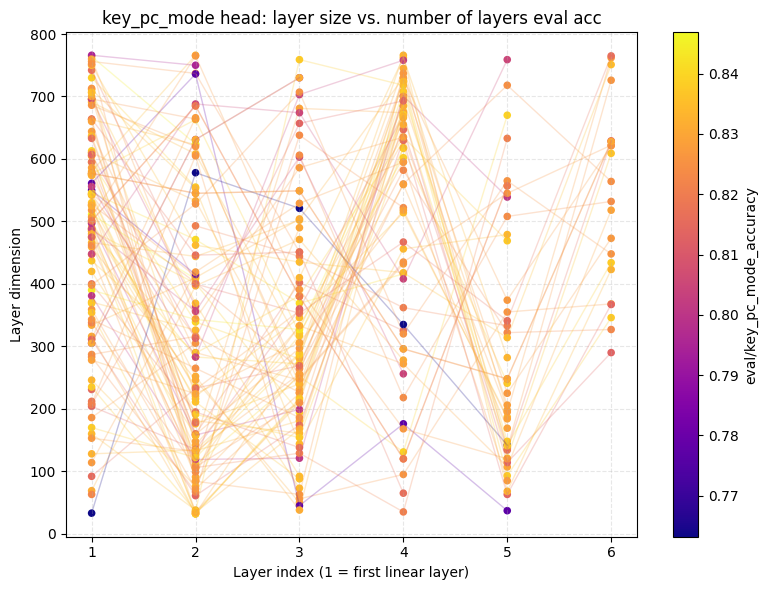

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
target = "key_pc_mode"
target_columns = [column for column in data_filtered.columns.values if target  in column]
df_target = data_filtered[target_columns]
df = df_target.copy()

def parse_dims(v):
    if isinstance(v, (list, tuple, np.ndarray)):
        return list(map(int, v))
    if pd.isna(v):
        return []
    if isinstance(v, str):
        v = v.strip()
        try:
            out = literal_eval(v)
            if isinstance(out, (list, tuple)):
                return list(map(int, out))
        except Exception:
            v = v.strip("[]()")
            parts = [p.strip() for p in v.split(",") if p.strip()]
            try:
                return [int(p) for p in parts]
            except Exception:
                return []
    return []

df["__dims__"] = df[f"{target}.linear_layers_dim"].apply(parse_dims)


rows = []
for ridx, row in df.iterrows():
    try:
        n_layers = int(row[f"{target}.num_linear_layers"])
    except Exception:

        try:
            n_layers = int(str(row[f"{target}.num_linear_layers"]).strip())
        except Exception:
            continue

    dims = row["__dims__"]
    acc = float(row[f"eval/{target}_accuracy"])
    n = min(n_layers, len(dims))
    for layer_idx in range(1, n + 1):
        rows.append({
            "row_id": ridx,
            "layer": layer_idx,
            "dim": dims[layer_idx - 1],
            "acc": acc
        })

long_df = pd.DataFrame(rows)
if long_df.empty:
    raise ValueError("No points to plot: check your columns and data parsing.")


fig, ax = plt.subplots(figsize=(8, 6))
norm = plt.Normalize(long_df["acc"].min(), long_df["acc"].max())
cmap = plt.cm.plasma

for rid, g in long_df.groupby("row_id"):
    color = cmap(norm(g["acc"].iloc[0]))
    ax.plot(g["layer"], g["dim"], color=color, alpha=0.25, linewidth=1)

sc = ax.scatter(
    long_df["layer"],
    long_df["dim"],
    c=long_df["acc"],
    cmap=cmap,
    norm=norm,
    s=30,
    edgecolors="none"
)

ax.set_xlabel("Layer index (1 = first linear layer)")
ax.set_ylabel("Layer dimension")
ax.set_xticks([1, 2, 3, 4, 5, 6]) 
ax.set_title(f"{target} head: layer size vs. number of layers eval acc")
cb = fig.colorbar(sc, ax=ax)
cb.set_label(f"eval/{target}_accuracy")

ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


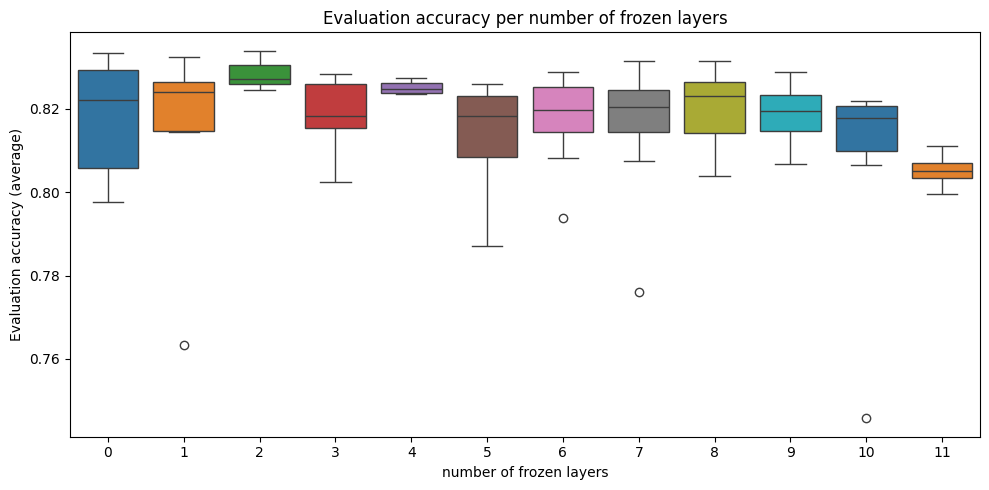

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
#sns.stripplot(data=data_filtered,  x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)
sns.boxplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("number of frozen layers")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per number of frozen layers")
#plt.legend(title="Frozen Layers", bbox_to_anchor = (1,0.5))
plt.legend('',frameon=False)
plt.tight_layout()
#plt.savefig("figures/frozen_layers_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

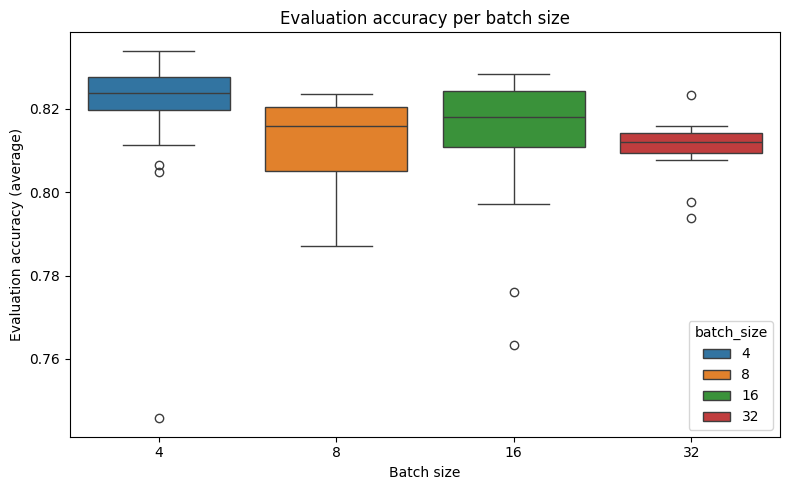

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=data_filtered,x='batch_size', y='eval/accuracy', hue='batch_size', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per batch size")
#plt.legend(title="Frozen Layers")
plt.tight_layout()
#plt.savefig("figures/batch_size_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

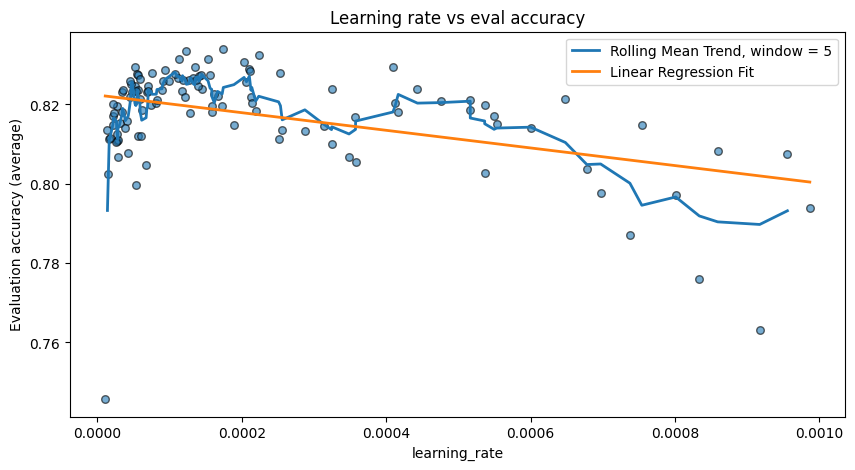

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

#  linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 5, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend, window = 5')
ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

ax.set_xlabel("learning_rate")
ax.set_ylabel("Evaluation accuracy (average)")
ax.set_title("Learning rate vs eval accuracy")
ax.legend()
#plt.savefig("figures/learning_rate_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 4 by 4 plots

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def display_four(data_filtered, parameter, targets= None, mode = False, box = False, full_name = None):

    df = data_filtered.copy()

    def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
    
    suffix = ".mode" if mode else ""
    # Define targets with possible column-name variants
    targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
    axes = axes.ravel()

    for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
        layer_col = pick_col(df, layer_cands)
        acc_col   = pick_col(df, acc_cands)
        #ax.set_ylim(0.7, 0.9)
        try:
            order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
        except Exception:
            order = sorted(df[layer_col].dropna().astype(str).unique())

        plot_df = df.copy()
        plot_df[layer_col] = plot_df[layer_col].astype(str)
        # if mode:
        #     order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    
        if box:
            sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        else:
            sns.stripplot(
                data=plot_df, x=layer_col, y=acc_col,
                order=order, jitter=True, size=5, ax=ax
            )


            means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                            .mean()
                            .reindex(order))
            ax.plot(order, means.values, marker='o')

        ax.set_xlabel(f"{parameter}")
        ax.set_ylabel(f"Evaluation accuracy")
        ax.set_title(f" {name}")
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    fig.suptitle(f"Accuracy per {full_name} (by target)", y=0.98)
    plt.tight_layout()
    suffix = "with_mode" if mode else ""
    plt.savefig(f"figures/{parameter}_{suffix}_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return targets

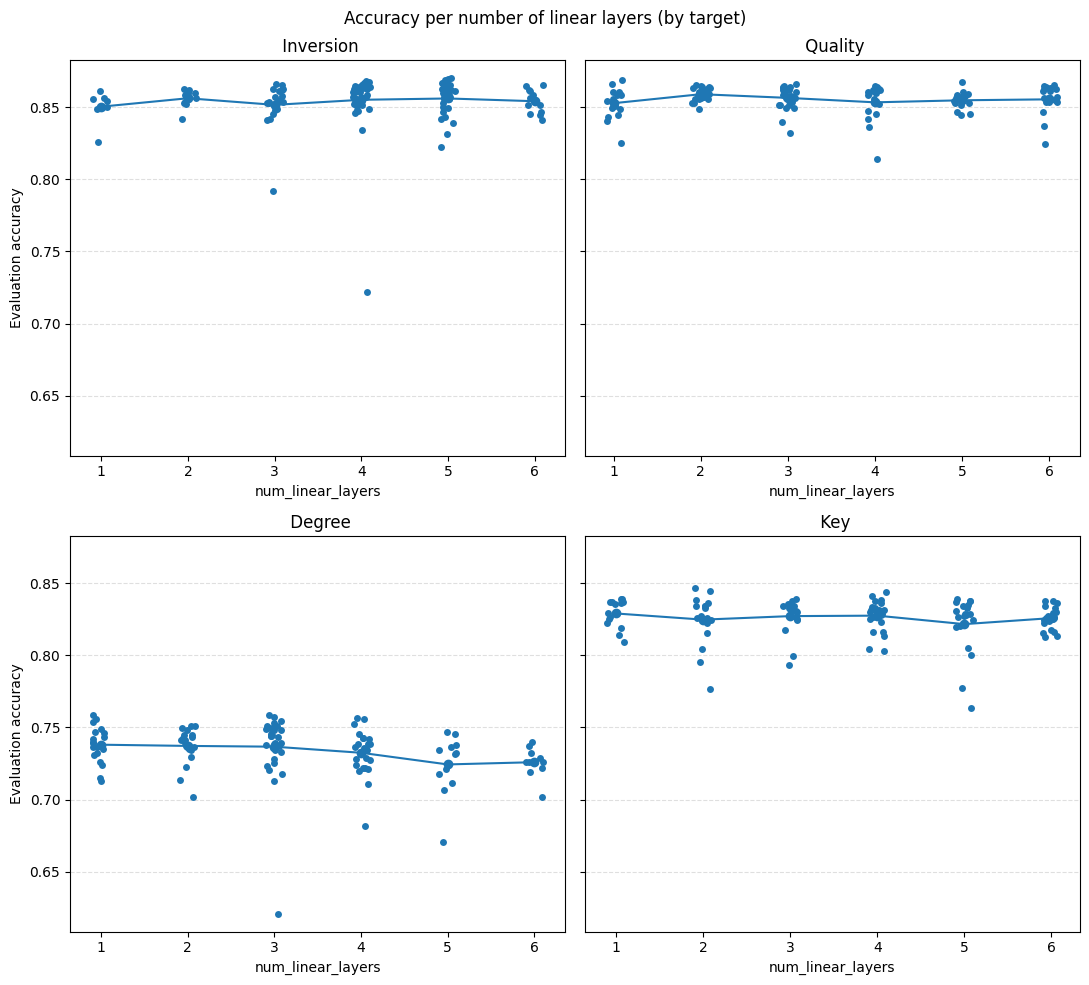

In [43]:
targets =display_four(data_filtered, parameter= "num_linear_layers", full_name = "number of linear layers", box = False)

In [44]:
import statistics 
def get_mode(parameter, target, data):
    statistics.mode(data_filtered[f"{target}.{parameter}"][0])
    data[f"{target}.{parameter}.mode"] =  data_filtered[f"{target}.{parameter}"].apply(lambda x : statistics.mode(x))
    return data

In [45]:
def create_df_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) == 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: v[0]
    )
    return df_target

In [46]:
def create_df_parameter(df, target, parameter):
    # Check if all activations are the same
    def check_unique(v):
        unique = set(v)
        return list(unique)[0] if len(unique) == 1 else "mix"
    print(f"{target}.{parameter}")
    df_target = df[[f"{target}.{parameter}", f"eval/{target}_accuracy"]].copy()
    
    df_target[f"{target}.{parameter}_unique"] = df_target[f"{target}.{parameter}"].apply(check_unique)
    return df_target

In [47]:
def create_df_not_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) > 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: "mix"
    )
    return df_target

inversion.activation_fn
quality.activation_fn
degree.activation_fn
key_pc_mode.activation_fn


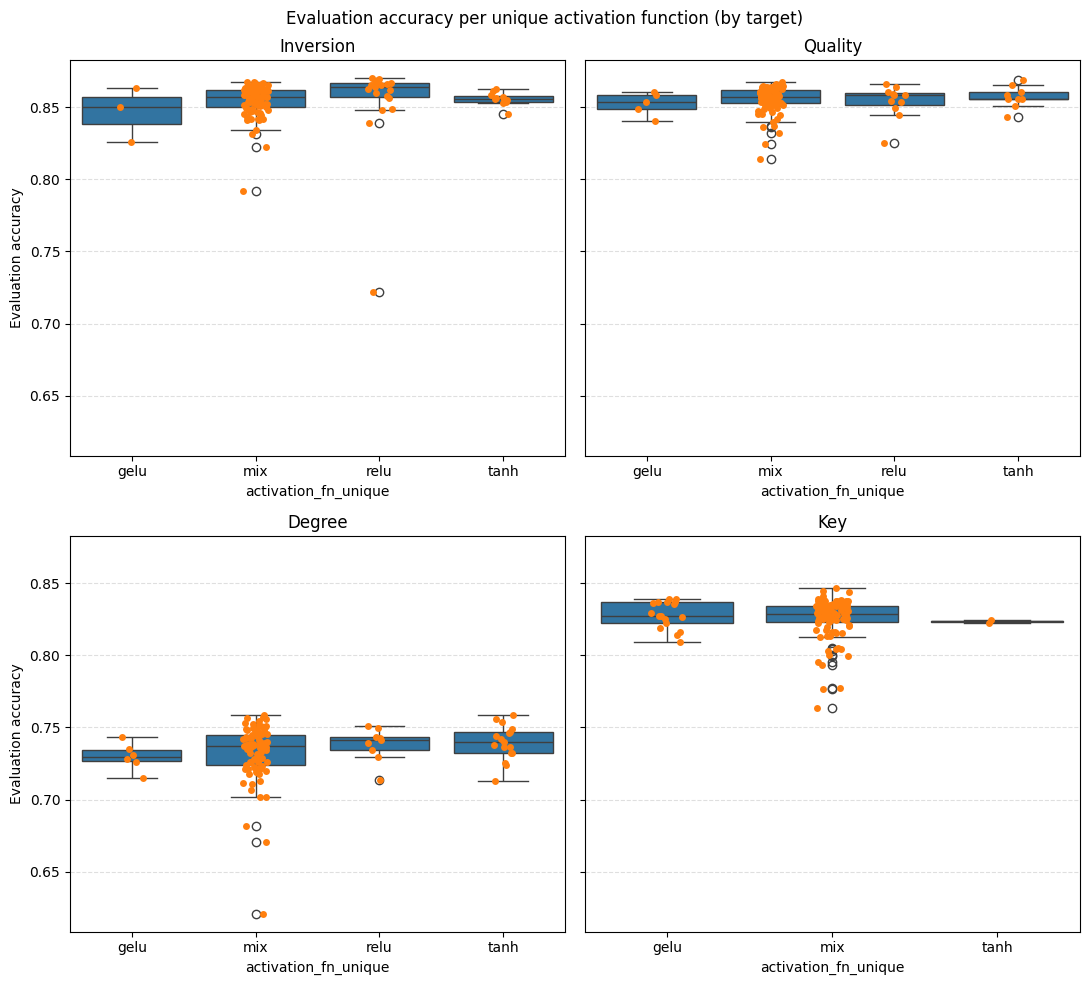

In [49]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "activation_fn")
    df_activation_array.append(df_target)
parameter = "activation_fn_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

inversion.normalisation
quality.normalisation
degree.normalisation
key_pc_mode.normalisation


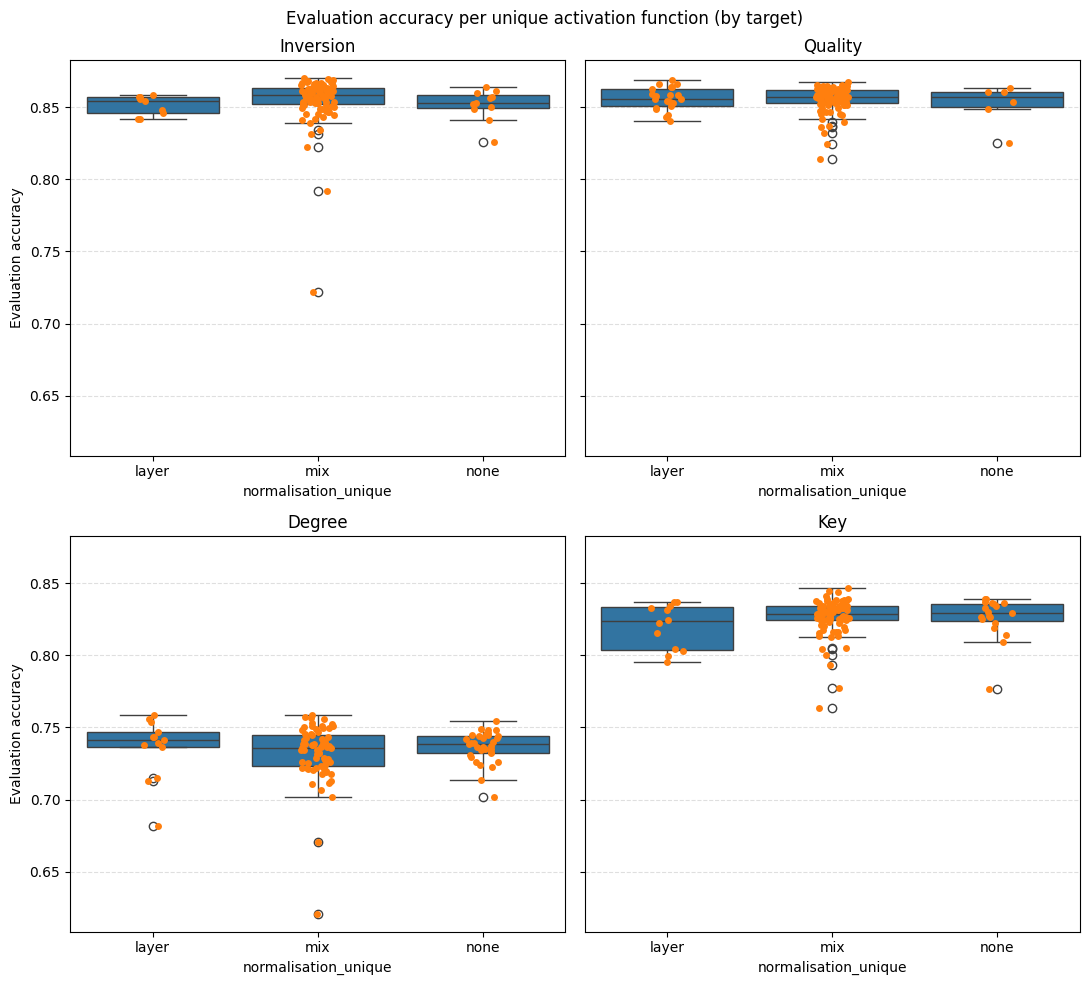

In [51]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "normalisation")
    df_activation_array.append(df_target)
parameter = "normalisation_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"degree.{parameter}{suffix}"],
        ["eval/degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [52]:
targets = ["inversion", "quality", "key_pc_mode","degree" ]
parameter = "activation_fn"
data_filtered_copy = data_filtered.copy()
for target in targets:
    data_filtered_copy=  get_mode(parameter, target, data_filtered_copy)
data_filtered_copy.head()

,Name,State,Group,seed,train/learning_rate,eval/degree_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/inversion_accuracy,freeze_layers,...,key_pc_mode.activation_fn,inversion.linear_layers_dim,test/degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy,inversion.activation_fn.mode,quality.activation_fn.mode,key_pc_mode.activation_fn.mode,degree.activation_fn.mode
0,new_trial_60,finished,nas_layers_extended_new,42,0.000048,0.753997,0.838685,0.863146,0.862059,0,...,"[gelu, relu]","[217,209,688,176,391,83]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
1,new_trial_59,finished,nas_layers_extended_new,42,0.000147,0.736468,0.829641,0.858425,0.853771,6,...,[gelu],"[215,233,630,168]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
2,new_trial_58,finished,nas_layers_extended_new,42,0.000042,0.758559,0.839482,0.868861,0.867130,0,...,[gelu],"[168,207,589,301,299]",NaN,NaN,NaN,NaN,tanh,tanh,gelu,tanh
3,new_trial_57,finished,nas_layers_extended_new,42,0.000058,0.750173,0.830685,0.866130,0.862716,3,...,"[gelu, tanh, tanh]","[435,78,129,166]",NaN,NaN,NaN,NaN,tanh,gelu,tanh,relu
4,new_trial_56,finished,nas_layers_extended_new,42,0.000027,0.740989,0.828199,0.855739,0.860999,10,...,"[gelu, tanh, tanh, gelu]","[288,330,467,197]",NaN,NaN,NaN,NaN,relu,tanh,gelu,relu


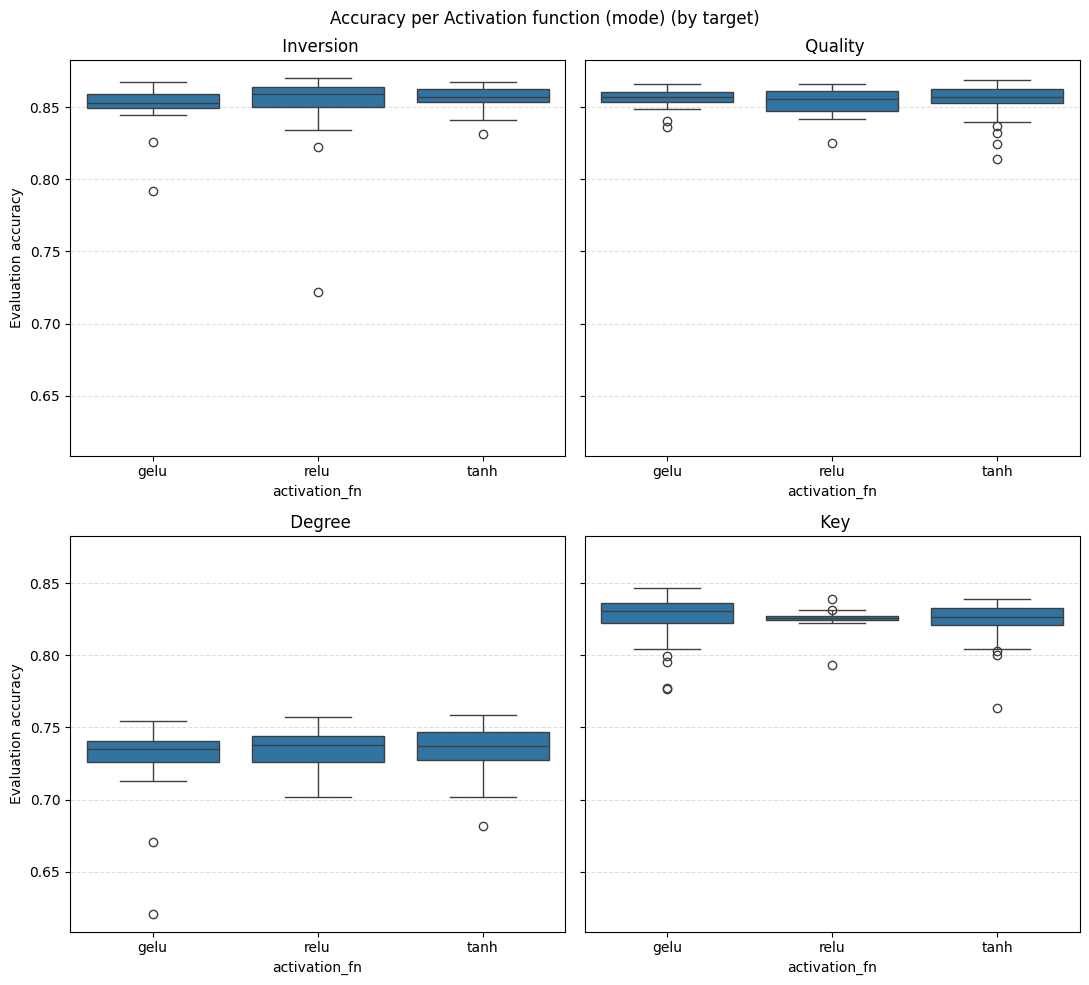

In [53]:
targets =display_four(data_filtered_copy, parameter= "activation_fn", mode = True, box = True, full_name="Activation function (mode)")